In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_7464\2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


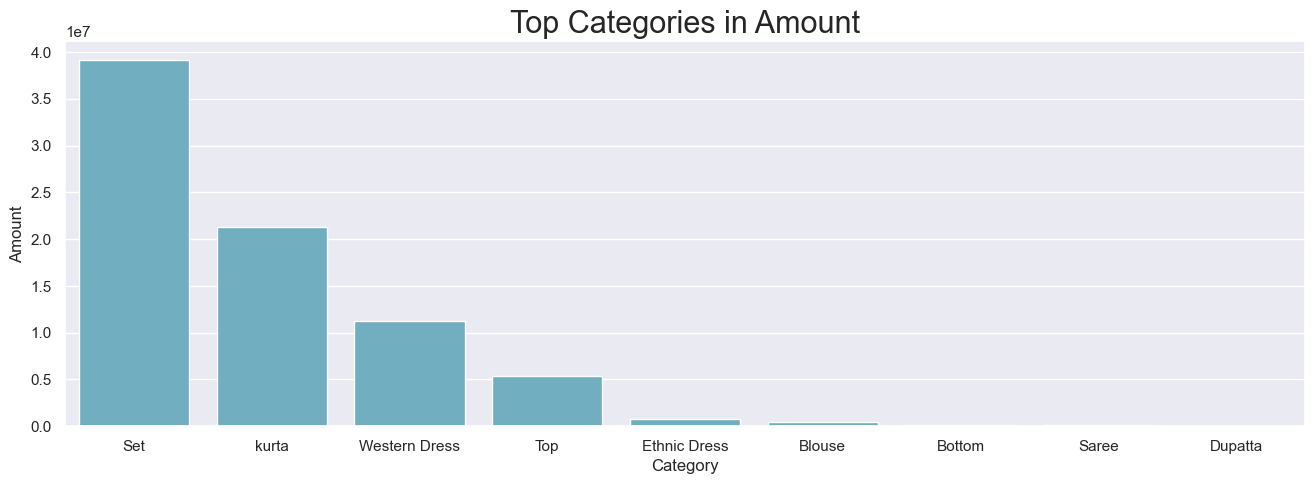

In [64]:
df.groupby(['Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

amt_of_cate = df.groupby(['Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={"figure.figsize":(16,5)})
sns.barplot(x='Category', y='Amount', data = amt_of_cate, color= 'c' )
plt.title("Top Categories in Amount", fontsize=22)

plt.savefig(r'C:\Users\user\Desktop\2nd project\Save Figures\Top Categories in amt', dpi=300, bbox_inches='tight')
plt.show()

### The Most of  Sales are Categories is 'Set, Kurta and Wastern Dress'.

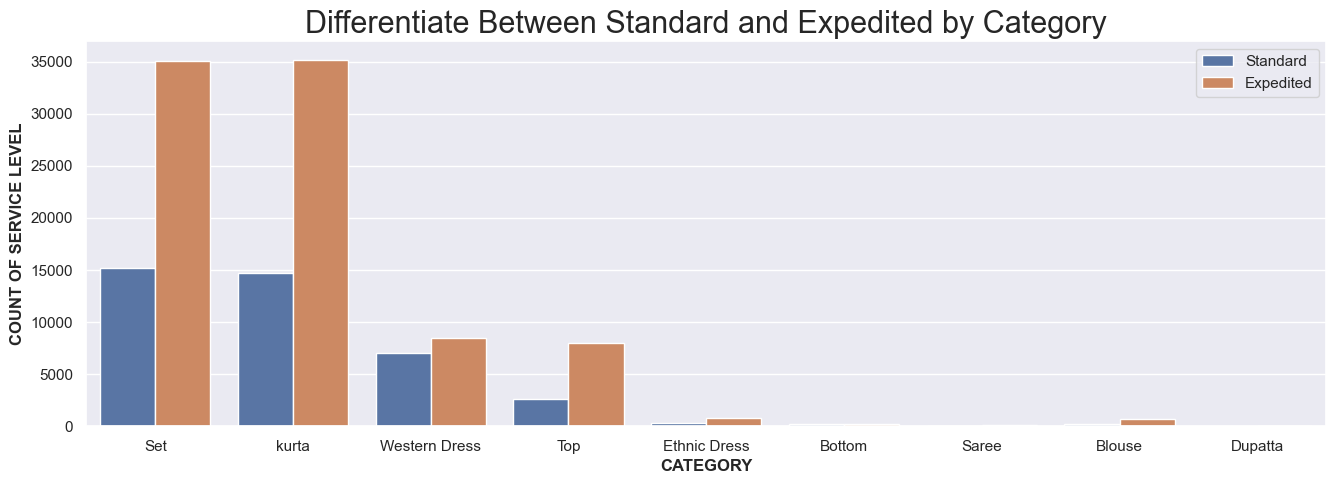

In [63]:
ax = sns.countplot(x='Category', data=df, hue='ship-service-level',)
plt.title("Differentiate Between Standard and Expedited by Category", fontsize=22)
plt.ylabel("COUNT OF SERVICE LEVEL", fontweight='bold')
plt.xlabel("CATEGORY", fontweight='bold')
plt.legend(loc='upper right')

plt.savefig(r'C:\Users\user\Desktop\2nd project\Save Figures\Differentiate Between Standard and Expedited', dpi=300, bbox_inches='tight')
plt.show()

## The quantity of Expedited service levels is significantly larger compared to Standard service levels, categorized by sales category."

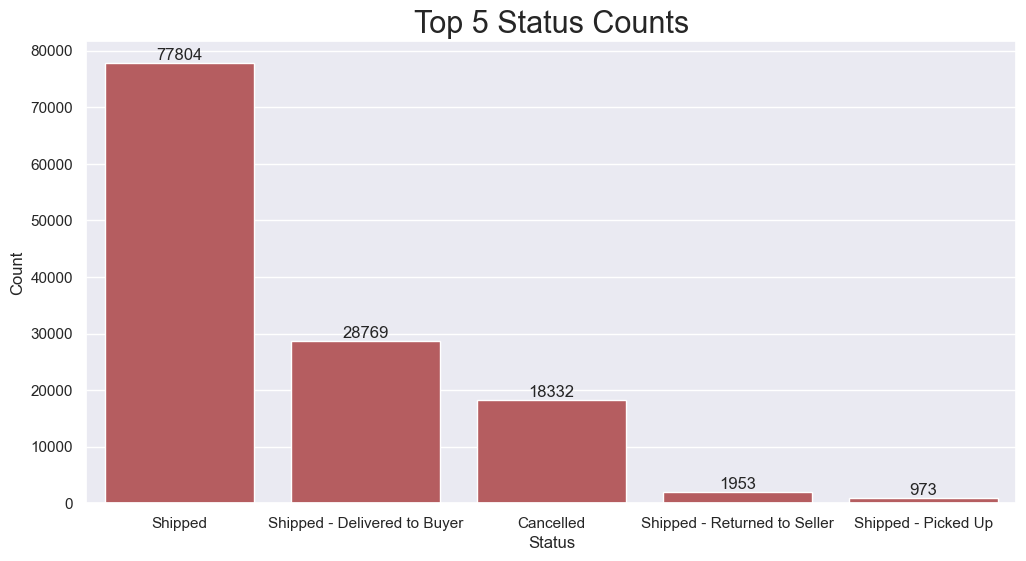

In [62]:
status_counts = df['Status'].value_counts().head(5)

df_top_status = df[df['Status'].isin(status_counts.index)]
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='Status', data=df_top_status, order=status_counts.index, color='r')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Top 5 Status Counts", fontsize=22)
plt.xlabel("Status")
plt.ylabel("Count")


plt.savefig(r'C:\Users\user\Desktop\2nd project\Save Figures\Top 5 Status Counts.png', dpi=300, bbox_inches='tight')



plt.show()

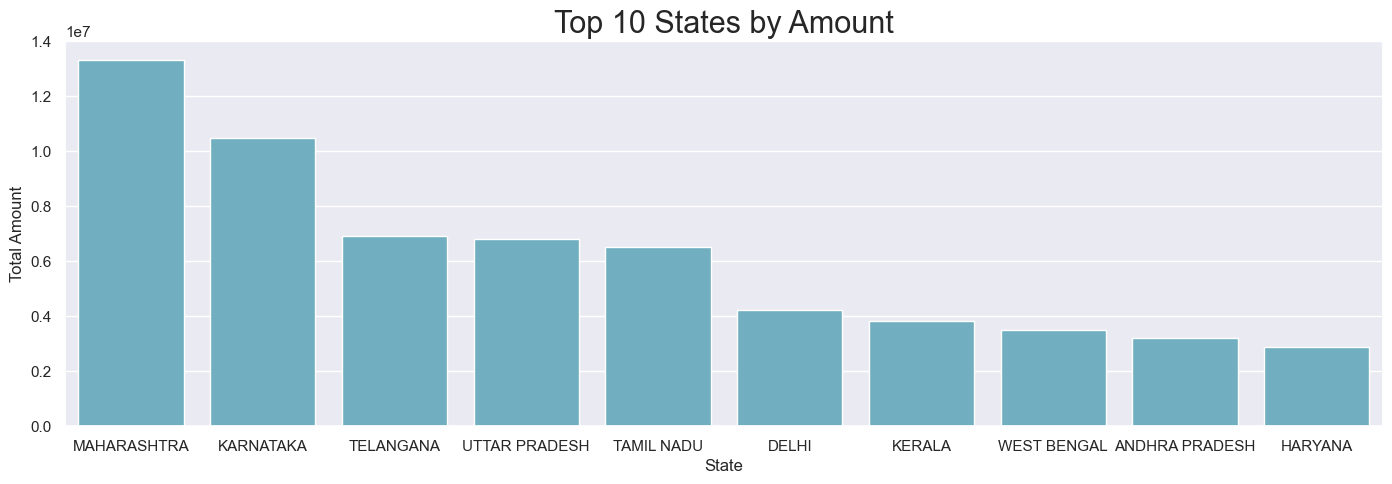

In [60]:
state_amount_sum = df.groupby('ship-state', as_index=False)['Amount'].sum()
state_amount_sum = state_amount_sum.sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(17, 5))  # Set the figure size

# Use Seaborn to plot a bar chart
sns.barplot(x='ship-state', y='Amount', data=state_amount_sum, color='c')

plt.title("Top 10 States by Amount", fontsize=22)
plt.xlabel("State")
plt.ylabel("Total Amount")


plt.savefig(r'C:\Users\user\Desktop\2nd project\Save Figures\figure_name.png', dpi=300, bbox_inches='tight')



plt.show()

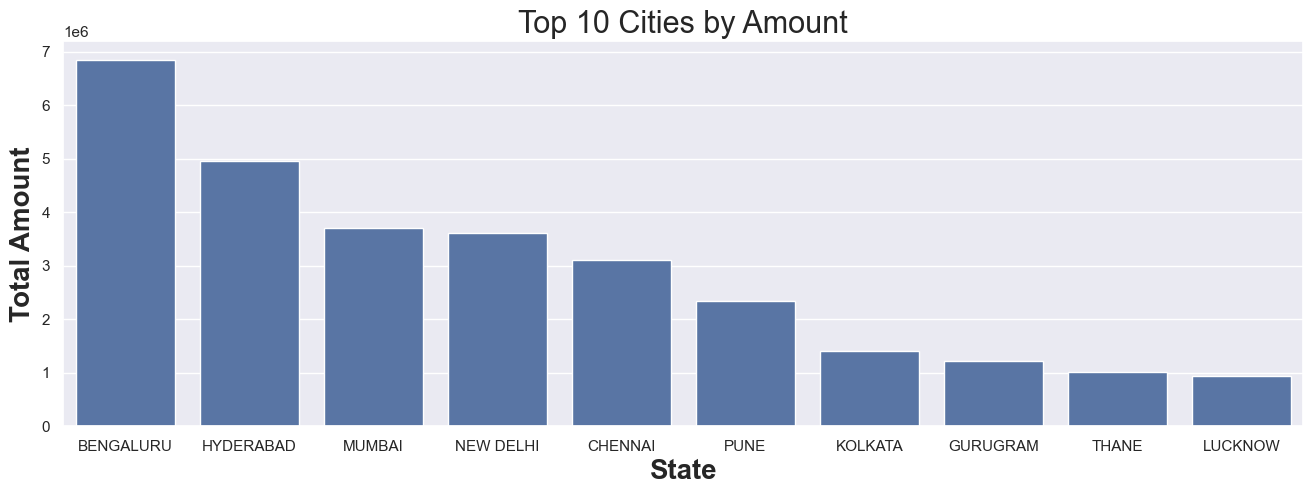

In [61]:
state_amount_sum = df.groupby('ship-city', as_index=False)['Amount'].sum()
state_amount_sum = state_amount_sum.sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(16, 5))  # Set the figure size

# Use Seaborn to plot a bar chart
custom_palette = sns.color_palette("Blues_r", n_colors=10)
sns.barplot(x='ship-city', y='Amount', data=state_amount_sum)

# for bars in ax.containers:
#     ax.bar_label(bars)

plt.title("Top 10 Cities by Amount", fontsize=22)
plt.xlabel("State", fontweight='bold', fontsize='20')
plt.ylabel("Total Amount", fontweight='bold', fontsize='20')


plt.savefig(r'C:\Users\user\Desktop\2nd project\Save Figures\figure_name.png', dpi=300, bbox_inches='tight')



plt.show()